In [2]:
# Data preparation for Ph.D thesis
# @author: Andres L. Suarez-Cetrulo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

#Alpha Vantage API to download 15 days of minute data (only if required)
from alpha_vantage.timeseries import TimeSeries
apikey='E8HE93TKWNLCACEU'
ts = TimeSeries(key=apikey)

# Using TALib abstract API to create a dictionary of technical indicators to iterate later.
from talib import abstract

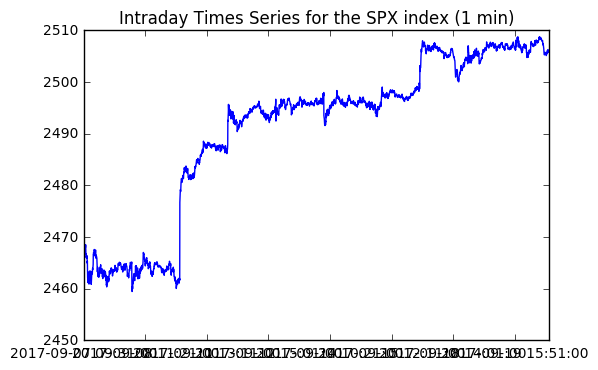

In [3]:
# ###############################################
# IMPORTANT! Only run if we need to download data / print de new trend
# ###############################################

# Get pandas object with the intraday data and another with the call's metadata
ts = TimeSeries(key=apikey, output_format='pandas')

symbol='SPX' #'SPX'=SP500 / S

if symbol=='SPX':
    data1, meta_data = ts.get_intraday('SPX', interval='1min', outputsize='full')
    csv_path="/home/cetrulin/Desktop/Andres/data/raw/alpha_vantage/S&P500/S&P500_"+str(datetime.date.today())+".csv"
elif symbol=='S': 
    data1, meta_data = ts.get_intraday('S', interval='1min', outputsize='full')
    csv_path="/home/cetrulin/Desktop/Andres/data/raw/alpha_vantage/S/S_"+str(datetime.date.today())+".csv"

# Print closing price trend
data1['close'].plot() #this way the dates appear
plt.title('Intraday Times Series for the '+symbol+' index (1 min)')
plt.show()

# Save dataframe in a csv 
data1.to_csv(csv_path, sep='\t', encoding='utf-8')
# ###############################################


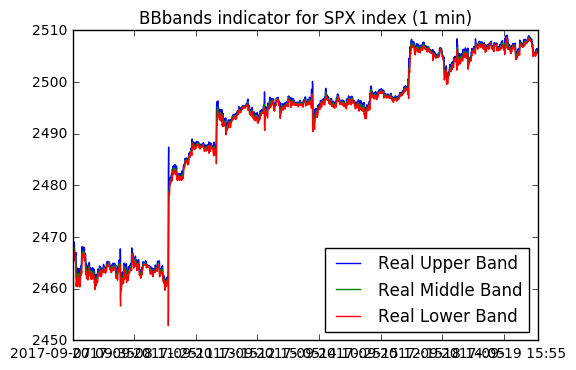

In [4]:
# ###############################################

# Example of how to use Technical Indicators directly from Alpha Vantage
from alpha_vantage.techindicators import TechIndicators

ti = TechIndicators(key='E8HE93TKWNLCACEU', output_format='pandas')
data, meta_data = ti.get_bbands(symbol=symbol, interval='1min', time_period=5)
data.plot()
plt.title('BBbands indicator for '+symbol+' index (1 min)')
plt.show()

# e.g. rsi
#tmp_data, tmp_meta_data = ti.get_rsi(symbol='S&P500', interval='5min', time_period=200)

# Not used aiming a more general approach which scripts were able to be used with data of other sources.
# ###############################################


In [6]:
# example path: "/home/cetrulin/Desktop/Andres/data/APPL/AAPL_prices_sample.csv"
# csv_path="/home/cetrulin/Desktop/Andres/data/raw/S&P500/S&P500_2017-08-27.csv"
if symbol=='SPX':
    csv_path="/home/cetrulin/Desktop/Andres/data/raw/alpha_vantage/S&P500/S&P500_"+str(datetime.date.today())+".csv"
elif symbol=='S': 
    csv_path="/home/cetrulin/Desktop/Andres/data/raw/alpha_vantage/S/S_"+str(datetime.date.today())+".csv"

df=pd.read_csv(csv_path, sep='\t', parse_dates=True,infer_datetime_format=True)

#df.drop also drops the selected column (if value=1) or rows (if =0)
#df = df.drop(df.columns[[0]], 1)
#df = df.drop('symbol', 1)

# Label columns
df.columns = ['date','low','close','open','high','volume']
#df

In [30]:
#Add parameters to transform in TS
timeseries=['low','close','open','high','volume']
#Length of the TS. How many values do we keep per serie. 
# e.g. 1 -> t / 2 -> t,t-1 / 3 -> t,t-1,t-2 / 4 -> t,t-1,t-2,t-3
length = 4

# Add lagged times
for column in timeseries:
    #df[column+'_t']=df[column]
    for i in range(1,length):
        df[column+'_t-'+str(i)]=df[column].shift(i) #it could also be sorted and group by if needed
    #del drops the delected df column
    #del df[column]

In [31]:
# Creating a dictionary of technical indicators using TALib abstract API
indicator = {}
# Add as many indicators as necessary: see all indicators in https://mrjbq7.github.io/ta-lib/
indicator['sma']=abstract.Function('sma')
indicator['rsi']=abstract.Function('rsi')
indicator['adx']=abstract.Function('adx')
indicator['cci']=abstract.Function('cci')
indicator['aroon']=abstract.Function('aroon')
indicator['bbands']=abstract.Function('bbands')
indicator['willr']=abstract.Function('willr')
indicator['macd']=abstract.Function('macd')
indicator['stoch']=abstract.Function('stoch')
indicator['ad']=abstract.Function('ad')
indicator['obv']=abstract.Function('obv')

# Show the descriptions
#for ind in list(indicator.values()):
#    print('===============================')
#    print(ind)
#    print('===============================')
#    print()


In [32]:
# ###########################################
# Iterate and run list of indicators selected
# All of them produced for 25 prior mins of data 
# ###########################################
for key in list(indicator.keys()):
    key_output=indicator[key](df, timeperiod=25) #, price='close')
    
    # For indicators that only return one column (this will need to be modified depending on the selection of indicators)
    if key not in ['bbands','aroon','stoch','macd']:
        df[key]=indicator[key](df, timeperiod=25) 
    # Otherwise check the list of columns and return all
    else: 
        for j in range(0,len(list(key_output.columns))):
            df[key+'_'+key_output.columns[j]]=key_output[[j]]

df

,date,low,close,open,high,volume,low_t-1,low_t-2,low_t-3,close_t-1,...,bbands_lowerband,rsi,adx,aroon_aroondown,aroon_aroonup,willr,stoch_slowk,stoch_slowd,sma,obv
0,2017-09-06 09:31:00,2463.83,0.0,2465.26,2465.79,2463.83,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
1,2017-09-06 09:32:00,2465.42,0.0,2466.06,2466.50,2465.45,2463.83,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
2,2017-09-06 09:33:00,2466.07,0.0,2466.42,2466.99,2466.11,2465.42,2463.83,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
3,2017-09-06 09:34:00,2465.49,0.0,2465.49,2466.55,2466.45,2466.07,2465.42,2463.83,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
4,2017-09-06 09:35:00,2463.54,0.0,2463.61,2465.49,2465.49,2465.49,2466.07,2465.42,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
5,2017-09-06 09:36:00,2463.52,0.0,2463.94,2464.27,2463.52,2463.54,2465.49,2466.07,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
6,2017-09-06 09:37:00,2463.79,0.0,2464.14,2464.38,2463.94,2463.52,2463.54,2465.49,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
7,2017-09-06 09:38:00,2463.38,0.0,2463.56,2464.10,2464.09,2463.79,2463.52,2463.54,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463.83
8,2017-09-06 09:39:00,2463.56,0.0,2463.74,2463.95,2463.56,2463.38,2463.79,2463.52,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-88483.942748,-77616.353750,NaN,2463.83
9,2017-09-06 09:40:00,2463.39,0.0,2464.05,2464.41,2463.72,2463.56,2463.38,2463.79,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-144540.040787,-102085.636025,NaN,2463.83


In [33]:
# Creating label/y to be predicted

# Ten minutes ahead cloasing price as value y to predict
df['close_t+10']=df['close'].shift(-10)

In [34]:
# Filtering out first 50 mins of the day and last 10 minutes, 
# as they will have NaN values in either features or label (10 mins ahead)
# The last hour is not normally good for buying as we shouldn't keep nothing open by end of business.
# The first half an hour may not be great for training as there is a lot of factors coming from the 
#  European and Asian markets having impacting the results, more than in the rest of the day.

# Not between 09:30 and 10:20am and not from 5:50pm onwards
excluded_times=['09:3','09:4','09:5','10:0','10:1','15:5','16:0']
#df.date.str[11:15]
# Not between 09:30 and 10:20am (lack of prior times in TS and indicators) and not from 5:50pm onwards (lack of label)
df=df[~df.date.str[11:15].isin(excluded_times)]
#df['date'].between_time('09:00','10:00') #didn't work/check

In [35]:
len(df.columns)

39

In [36]:
# preview
df

,date,low,close,open,high,volume,low_t-1,low_t-2,low_t-3,close_t-1,...,rsi,adx,aroon_aroondown,aroon_aroonup,willr,stoch_slowk,stoch_slowd,sma,obv,close_t+10
49,2017-09-06 10:20:00,2462.53,0.0,2462.65,2463.47,2463.47,2463.53,2463.99,2464.40,0.0,...,0.0,9.862376,100.0,52.0,-49948.785425,-115576.580994,-128015.341132,0.0,2463.83,0.0
50,2017-09-06 10:21:00,2462.15,0.0,2462.40,2462.67,2462.66,2462.53,2463.53,2463.99,0.0,...,0.0,10.502670,100.0,48.0,-46381.015038,-90545.933153,-111846.938758,0.0,2463.83,0.0
51,2017-09-06 10:22:00,2462.46,0.0,2462.90,2462.97,2462.46,2462.15,2462.53,2463.53,0.0,...,0.0,10.962659,96.0,44.0,-46381.015038,-84879.515947,-97000.676698,0.0,2463.83,0.0
52,2017-09-06 10:23:00,2462.87,0.0,2463.28,2463.29,2462.87,2462.46,2462.15,2462.53,0.0,...,0.0,11.243147,92.0,40.0,-46381.015038,-102902.475696,-92775.974932,0.0,2463.83,0.0
53,2017-09-06 10:24:00,2462.61,0.0,2463.09,2463.48,2463.29,2462.87,2462.46,2462.15,0.0,...,0.0,11.601594,88.0,36.0,-46381.015038,-140752.453110,-109511.481584,0.0,2463.83,0.0
54,2017-09-06 10:25:00,2462.86,0.0,2462.87,2463.12,2463.08,2462.61,2462.87,2462.46,0.0,...,0.0,11.945703,84.0,32.0,-46381.015038,-168263.945383,-137306.291396,0.0,2463.83,0.0
55,2017-09-06 10:26:00,2462.43,0.0,2463.07,2463.14,2462.86,2462.86,2462.61,2462.87,0.0,...,0.0,12.424493,80.0,28.0,-46381.015038,-201588.421053,-170201.606515,0.0,2463.83,0.0
56,2017-09-06 10:27:00,2462.84,0.0,2462.86,2463.21,2463.08,2462.43,2462.86,2462.61,0.0,...,0.0,12.845346,76.0,24.0,-46381.015038,-218052.781955,-195968.382797,0.0,2463.83,0.0
57,2017-09-06 10:28:00,2462.80,0.0,2463.38,2463.72,2462.85,2462.84,2462.43,2462.86,0.0,...,0.0,12.973693,72.0,20.0,-46381.015038,-219973.444075,-213204.882361,0.0,2463.83,0.0
58,2017-09-06 10:29:00,2462.89,0.0,2463.49,2463.53,2463.34,2462.80,2462.84,2462.43,0.0,...,0.0,13.096907,68.0,16.0,-46381.015038,-205429.745293,-214485.323775,0.0,2463.83,0.0


In [37]:
# Export processed data
if symbol=='SPX':
    output_csv_path="/home/cetrulin/Desktop/Andres/data/analysis/S&P500/S&P500_"+str(datetime.date.today())+"_indicators.csv"
elif symbol=='S': 
    output_csv_path="/home/cetrulin/Desktop/Andres/data/analysis/S/S_"+str(datetime.date.today())+"_indicators.csv"

df.to_csv(output_csv_path, sep=';', encoding='utf-8')
